# Week 22

1.	Create a python function to scrape Yelp data for 50 restaurants close to you. Think about what data you want to scrape aside from the restaurant name and location. You must pick at least three other fields. You can use beautiful soup, selenium, scrapy, and/or splinter.

In [179]:
#import what I think I'll need

from bs4 import BeautifulSoup as bs
import requests
from splinter import Browser
from webdriver_manager.chrome import ChromeDriverManager
from scrapy import Selector
import time

import pandas as pd

In [153]:
# not sure I'm using this
# executable_path = {'executable_path':ChromeDriverManager().install()}
# browser = Browser('chrome',**executable_path, headless=False)

In [154]:
#url = "https://www.yelp.com/search?find_desc=Restaurants&find_loc=63040"


In [191]:
def scrape_urls():
    # function to get 50 restaurant urls
    # returns list of the 50 urls
    top_50_url = []
    for i in range(0, 50, 10):
        time.sleep(2)
        # url, with 10 restaurants at a time
        url = f'https://www.yelp.com/search?find_desc=Restaurants&find_loc=63040&start={i}'
        try:
            response = requests.get(url)
            soup = bs(response.text, 'html.parser')
            # get the top names
            ten_names = soup.find_all('span',class_="css-1pxmz4g")

            # first two and last parts of the list are ads, ignore
            for j in range(0, len(ten_names)):
                #get url to visit
                top_50_url.append(ten_names[j].a.get('href'))
        except AttributeError as e:
            print(e)
    
    return top_50_url

    

In [192]:
def get_rest_info(url_list):
    # takes list of urls to scrape on yelp
    # returns list of dictionaries with info
    
    top_50_url = url_list
    list50_restaurants = []
    #iterate over top_50_urls
    for i in range(0, len(top_50_url)):
        #add sleep function 
        time.sleep(3)
        
        #print progress every 5 visits
        if i%5 == 0:
            print("Visiting urls: ", str(i))
        
        # make urls
        url = f'https://www.yelp.com{top_50_url[i]}'

        try:
            response = requests.get(url)
            soup = bs(response.text, 'html.parser')
            sel = Selector(text = response.text)

            # order from yelp
            rank = i+1

            # get restaurant name
            name = soup.find('h1', class_="css-11q1g5y").text

            # get address
            try:
                address = soup.find('p', class_="css-chtywg").text
            except:
                address = ''

            #get number of stars with xpath, extract from list
            try:
                stars = sel.xpath \
                ('//*[@id="wrap"]/div[2]/yelp-react-root/div[1]/div[3]/div[1]/div[1]/div/div/div[2]/div[1]/span/div/@aria-label').extract()
                stars = stars[0]
            except:
                stars = ''

            # build category list
            category = []

            # number of reviews, text
            # exception for only 1 in the list
            try:
                cat_list = soup.find_all('span', class_="css-bq71j2")
                # if there is only one thing in the list, it's not number of reviews,
                # it's the category
                if len(cat_list) == 1:
                    num_reviews = 0
                    category.append(cat_list[0].a.text)
                else:
                    num_reviews = cat_list[0].text
            except:
                num_reviews = 0

            # find the categories listed for the restaurant
            try:
                for i in range(1, len(cat_list)):
                    category.append(cat_list[i].a.text)
            except:
                pass

            rest_dict = {"Rank": rank,
                        "Restaurant_Name": name,
                        "Address": address,
                        "Stars": stars,
                         "Number_Reviews": num_reviews,
                        "Category": category}
            list50_restaurants.append(rest_dict)

        except AttributeError as e:
            print(e)

    return list50_restaurants
    

In [161]:
yelp_urls = scrape_urls()

In [182]:
len(yelp_urls)

50

In [193]:
yelp_info = get_rest_info(yelp_urls)

Visiting urls:  0
Visiting urls:  5
Visiting urls:  10
Visiting urls:  15
Visiting urls:  20
Visiting urls:  25
Visiting urls:  30
Visiting urls:  35
Visiting urls:  40
Visiting urls:  45


In [194]:
yelp_df = pd.DataFrame(yelp_info)
yelp_df

Rank                         Restaurant_Name  \
0      1                     Big Chief Roadhouse   
1      2                     Benedetto's On Main   
2      3                                   Craft   
3      4                    Wildwood Pub & Grill   
4      5    Malinche Mexican Culinary Experience   
5      6                        Letty Lou's Cafe   
6      7                         Parkside Grille   
7      8                             Thai Bistro   
8      9                         The Stellar Hog   
9     10                                The Wolf   
10    11                          Chick-N-Elly's   
11    12                      Hola! Mexican Food   
12    13                The Crafty Chameleon Bar   
13    14                        Mulligan's Grill   
14    15                The Corner Pub and Grill   
15    16                       Wildwood BBQ Bash   
16    17                               El Maguey   
17    18                       Sunny Street Cafe   
18    19                    Dogwood Social House   
19    20                Panda Chinese Restaurant   
20    21          O'Dell's Irish Pub & Ale House   
21    22            St Louis Taco and Pita Grill   
22    23                Shack Breakfast & Lunch    
23    24                               Yen Ching   
24    25                      Sarah's on Central   
25    26                       Sauce on the Side   
26    27            JB’s Smokehouse & Sports Bar   
27    28            Phoenicia Mediterranean Deli   
28    29  Ninja Japanese Sushi Bar & Steak House   
29    30  Poor Richards Restaurant & Sports Club   
30    31                      The Masked Chicken   
31    32             Vallarta Mexican Restaurant   
32    33               Joe Boccardi's Ristorante   
33    34          Veritas Gateway to Food & Wine   
34    35                        Babal-Hara Gyros   
35    36                      Massa's Restaurant   
36    37              Clancy's Irish Pub & Grill   
37    38                       Super Smokers BBQ   
38    39                         Michelle's Cafe   
39    40                        Camila's Tex-Mex   
40    41                         Boardwalk Pizza   
41    42                          The Curry Club   
42    43                  Fallon’s Grill and Tap   
43    44                           Hunan Express   
44    45                  Peppers Deli & Bar-B Q   
45    46                               Mi Lupita   
46    47                           Dewey's Pizza   
47    48                Walnut Grill- Ellisville   
48    49                            Pizzarelli's   
49    50                            Chunmi Sushi   

                                              Address            Stars  \
0              17352 Manchester Rd Wildwood, MO 63038    4 star rating   
1                    16721 Main St Wildwood, MO 63040  3.5 star rating   
2              16524 Manchester Rd Wildwood, MO 63040  3.5 star rating   
3            17253 New College Ave Wildwood, MO 63040  3.5 star rating   
4            15939 Manchester Rd Ellisville, MO 63011    5 star rating   
5            17209 New College Ave Wildwood, MO 63040  3.5 star rating   
6                   505 Strecker Rd Ballwin, MO 63011    4 star rating   
7                   2436 Taylor Rd Wildwood, MO 63040    4 star rating   
8       40 Clarkson Wilson Ctr Chesterfield, MO 63017  4.5 star rating   
9                  15480 Clayton Rd Ballwin, MO 63011  4.5 star rating   
10                122A S Central Ave Eureka, MO 63025    4 star rating   
11                 106 S Central Ave Eureka, MO 63025  4.5 star rating   
12     1384 Clarkson Clayton Ctr Ellisville, MO 63011  4.5 star rating   
13                11 Clarkson Rd Ellisville, MO 63011    4 star rating   
14      15824 Fountains Plz Dr Chesterfield, MO 63017    4 star rating   
15                2801 Fountain Pl Wildwood, MO 63040    4 star rating   
16                    2408 Taylor Rd Grover, MO 63040  3.5 star rating   
17  Dierbergs Town 

In [172]:
yelp_urls

['/biz/big-chief-roadhouse-wildwood-2?osq=Restaurants',
 '/biz/benedettos-on-main-wildwood-2?osq=Restaurants',
 '/biz/craft-wildwood?osq=Restaurants',
 '/biz/wildwood-pub-and-grill-wildwood-3?osq=Restaurants',
 '/biz/malinche-mexican-culinary-experience-ellisville?osq=Restaurants',
 '/biz/letty-lous-cafe-wildwood?osq=Restaurants',
 '/biz/parkside-grille-ballwin?osq=Restaurants',
 '/biz/thai-bistro-wildwood?osq=Restaurants',
 '/biz/the-stellar-hog-chesterfield?osq=Restaurants',
 '/biz/the-wolf-ballwin?osq=Restaurants',
 '/biz/chick-n-ellys-eureka?osq=Restaurants',
 '/biz/hola-mexican-food-eureka?osq=Restaurants',
 '/biz/the-crafty-chameleon-bar-ellisville?osq=Restaurants',
 '/biz/mulligans-grill-ellisville-2?osq=Restaurants',
 '/biz/the-corner-pub-and-grill-chesterfield?osq=Restaurants',
 '/biz/wildwood-bbq-bash-wildwood?osq=Restaurants',
 '/biz/el-maguey-grover?osq=Restaurants',
 '/biz/sunny-street-cafe-wildwood-2?osq=Restaurants',
 '/biz/dogwood-social-house-ellisville?osq=Restaurants

In [180]:
time.sleep(5)

In [225]:
# how to rewrite file

# import json

# filenm = "./static/yelp_data.json"

# with open(filenm,'r+') as file:
#     file.seek(0)
#     json.dump(yelp_info, file, indent = 4)

In [226]:
# import os
# #os.remove(filenm)


# rewrite_data = [yelp_info[0:2]]

# with open(filenm,'r+') as file:
#     file.seek(0)
#     json.dump(rewrite_data, file, indent = 4)

2.	Create an API that calls your scrape function and stores the data when you call /scrape endpoint. The data you scrape should be viewable when you go to /all .

yelp.py is the flask app file for the website, yelp denied me access a few times

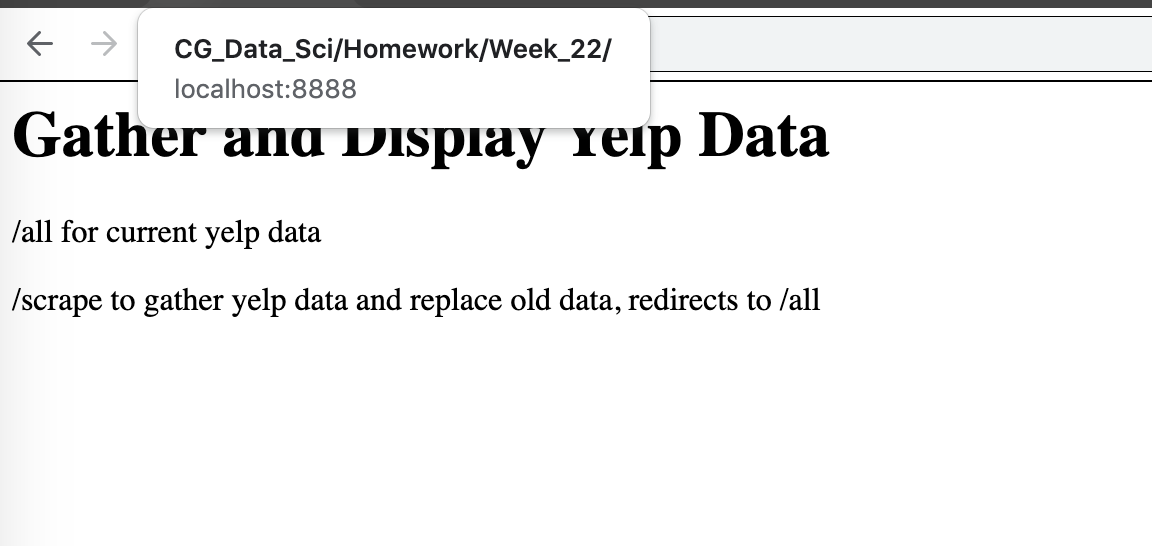

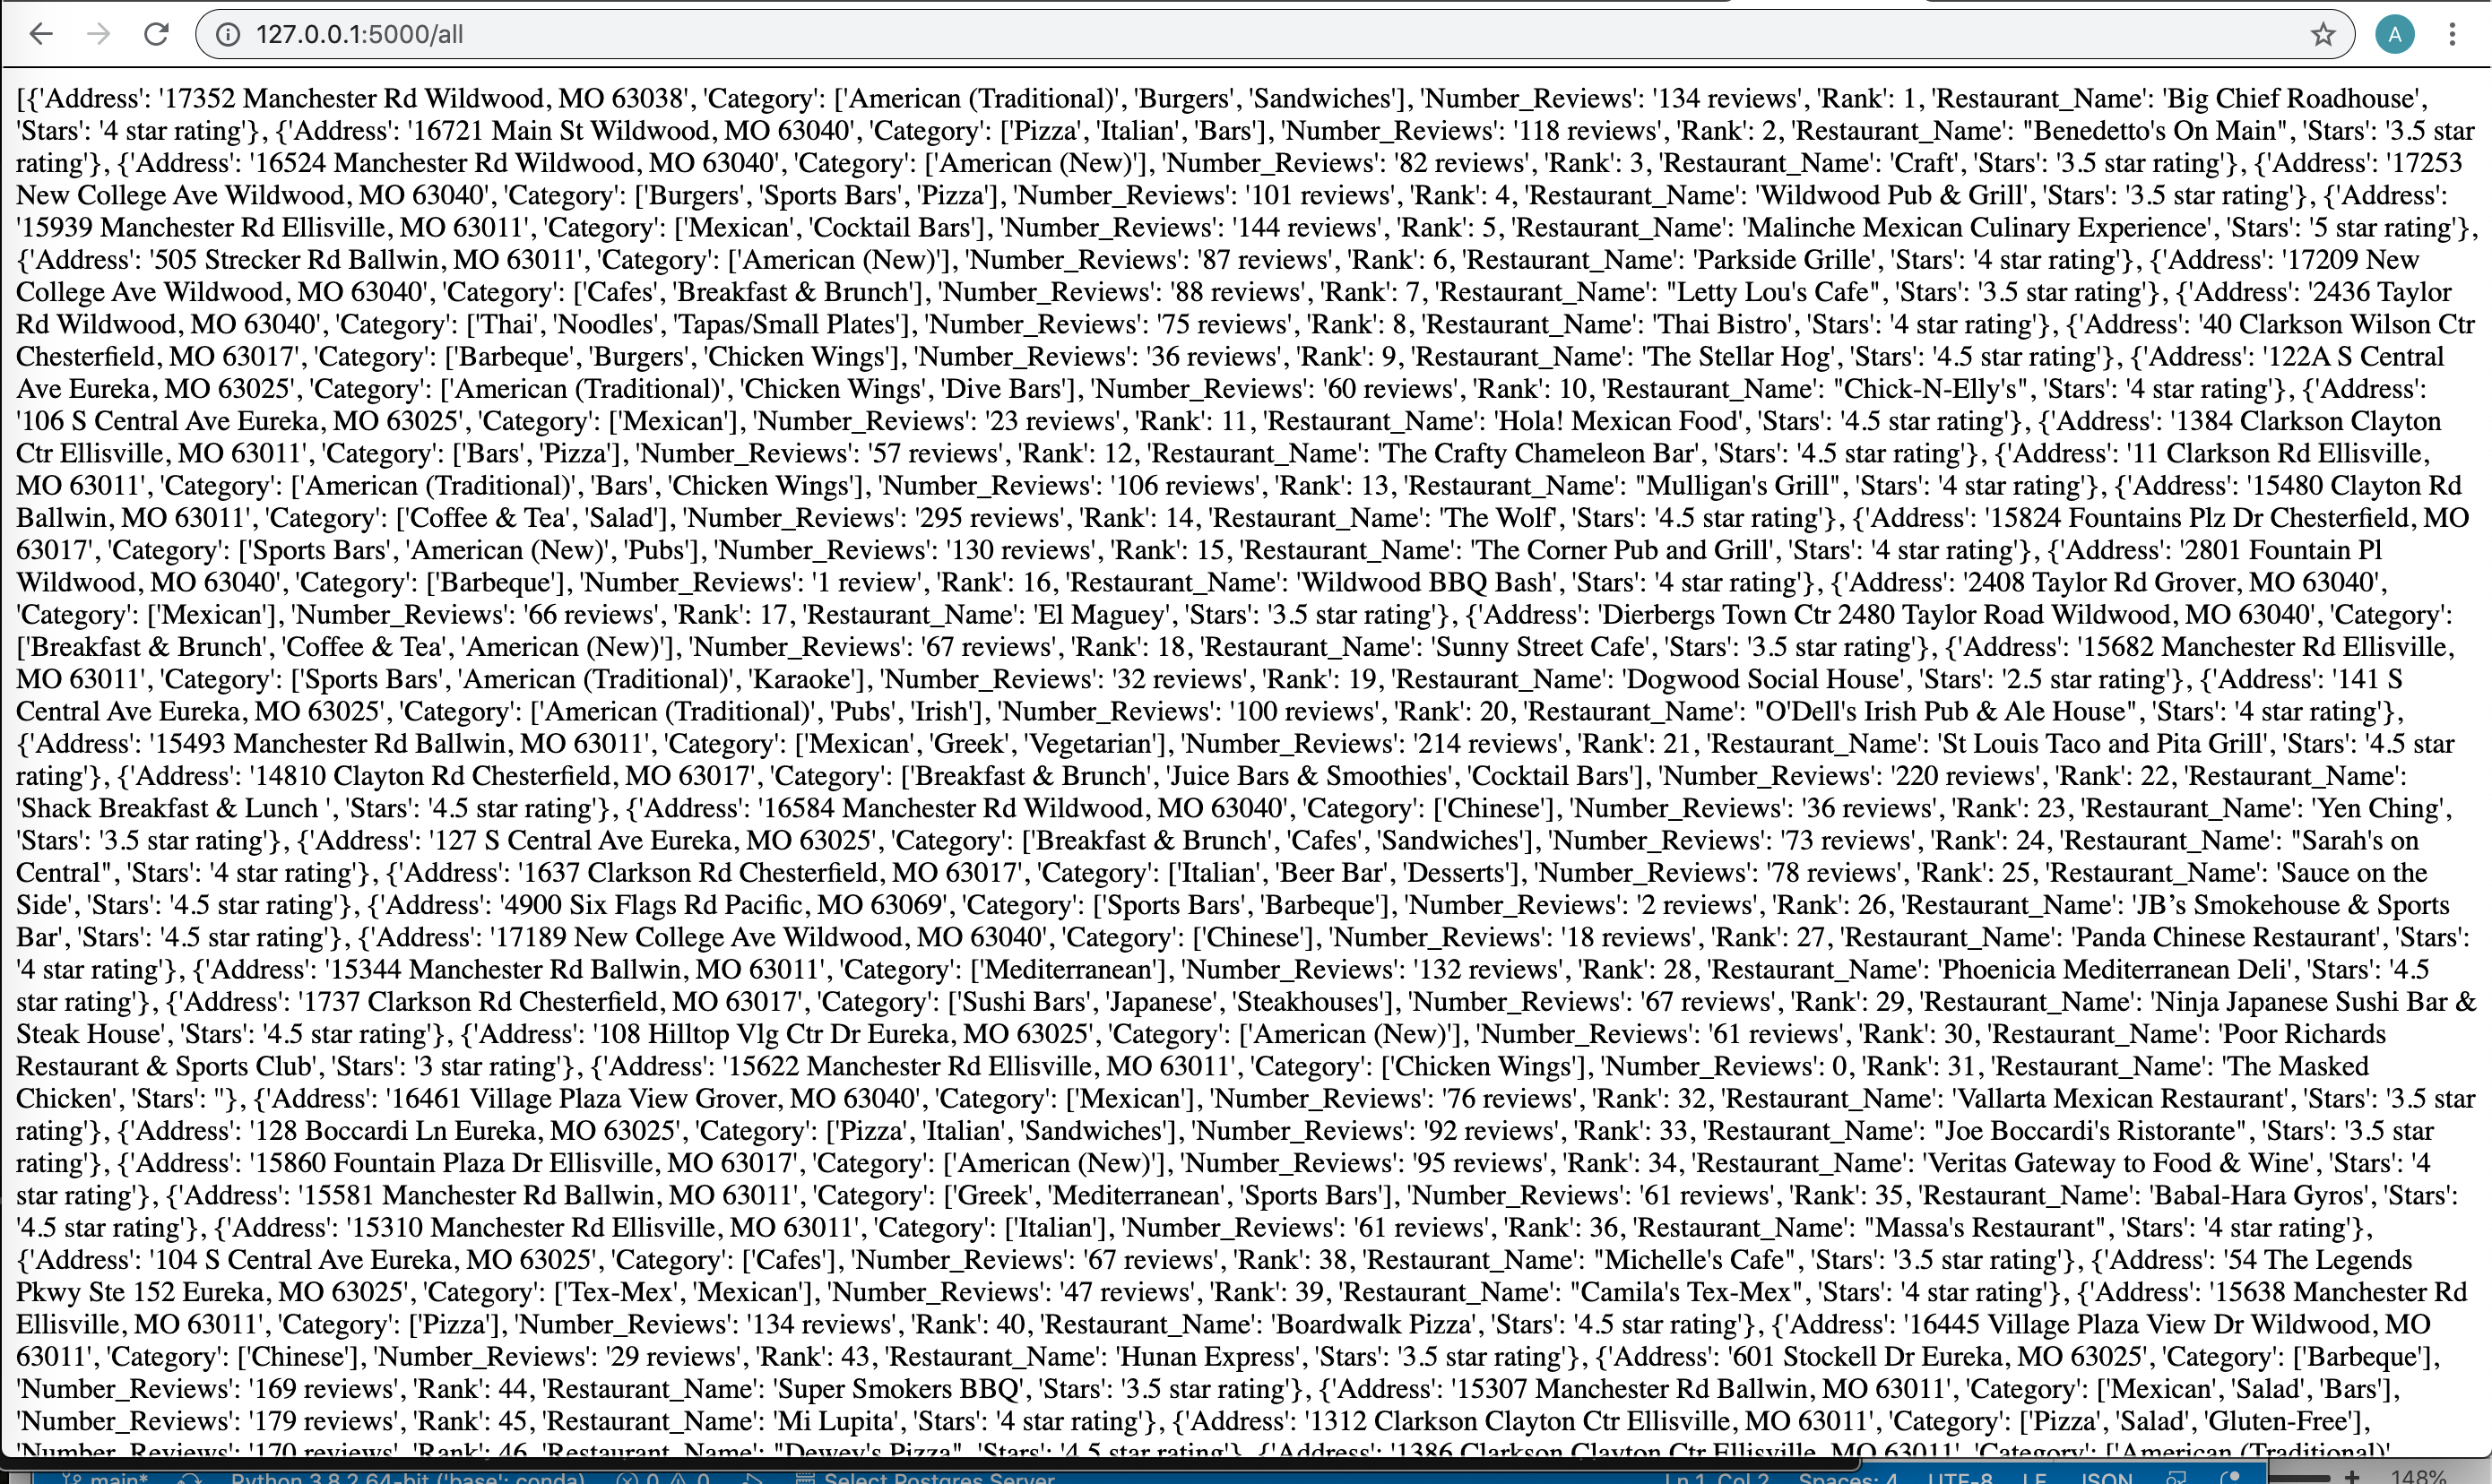

3.	What is web scraping? Why is it helpful? Why is it sometimes in a legal grey area or just plain illegal?!

Webscraping is automating visiting a website and gathering and saving data(content).  It can be helpful to track changes, gather large amounts of data for processing, automate testing, keep tabs on competitors, and more.

Sometimes, certain types of (or all) webscraping is against the terms of service for a website.  Visit the site's robots.txt file to find out more.   Webscraping legality may depend on the use of the data, copyright, and the country or jurisdiction.  Websites may also take measures to prevent scraping bots.